In [1]:
from tinytensor.engine import Tensor
from tinytensor.nn import Model, Dense, mse, l2_reg, array_to_Tensor_list, sgd
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs


X shape: (100, 2)
y shape: (100, 1)


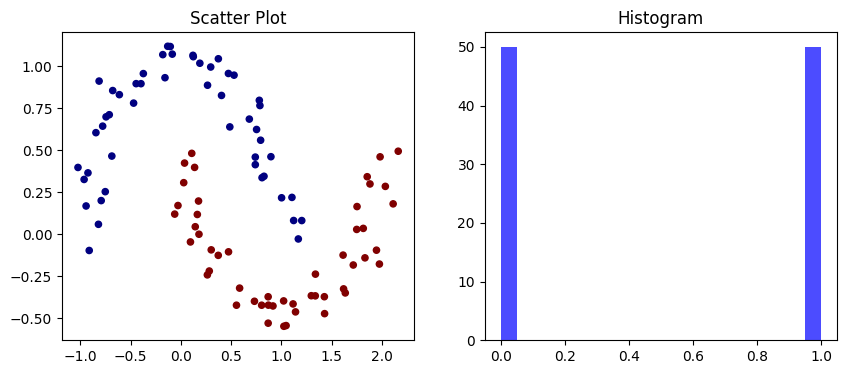

In [2]:
# Make dataset
X, y = make_moons(n_samples=100, noise=0.1)
y = y.reshape(-1,1)

print("X shape:",X.shape)
print("y shape:",y.shape)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Scatter plot on the left
axs[0].scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
axs[0].set_title('Scatter Plot')

# Histogram on the right
axs[1].hist(y, bins=20, color='blue', alpha=0.7)
axs[1].set_title('Histogram')

# Display the figure
plt.show()


In [3]:
# setup the model
Xt = array_to_Tensor_list(X)
yt = array_to_Tensor_list(y)

initial_model = Model()
initial_model.layers.append(Dense(2,16,"relu"))
initial_model.layers.append(Dense(16,16,"relu"))
initial_model.layers.append(Dense(16,1,"sigmoid"))


In [4]:
def loss(model: Model,x: list,y: list) -> Tuple[Tensor,float]:
        
    #forward pass
    yhats = list(map(model,x))

    #loss functions
    data_loss = mse(yhats,y)
    total_loss = data_loss

    #calculate accuracy
    accuracies = [(yhat.data > 0.5) == (yi.data > 0.5) for yhat,yi in zip(yhats,y)]
    accuracy = sum(accuracies) / len(accuracies)

    return total_loss,accuracy

def train(model: Model,X: list,y: list) -> list:
    
    total_loss,accuracy = loss(model,X,y)
    print(f"total_loss: {total_loss.data}; accuracy:{accuracy}")

    #backward
    total_loss.backward()

    #TODO: return grads here
    #get new layers
    grads = [layer.grads() for layer in model.layers]
    new_layers = [sgd(layer,grad,10) for layer,grad in zip(model.layers,grads)]
    new_model = Model(layers = new_layers)
    
    return new_model

In [5]:
def train_loop(model: Model,X: list,y: list,num_iterations: int) -> Model:
    for k in range(num_iterations):
        new_model = train(model,X,y)
        model = new_model

    return model

final_model = train_loop(initial_model,Xt,yt,num_iterations = 100)

total_loss: [[0.2499954]]; accuracy:[[0.74]]
total_loss: [[0.2499745]]; accuracy:[[0.83]]
total_loss: [[0.24994552]]; accuracy:[[0.85]]
total_loss: [[0.24990918]]; accuracy:[[0.83]]
total_loss: [[0.24986015]]; accuracy:[[0.83]]
total_loss: [[0.24979518]]; accuracy:[[0.83]]
total_loss: [[0.24970453]]; accuracy:[[0.83]]
total_loss: [[0.24957399]]; accuracy:[[0.83]]
total_loss: [[0.24937867]]; accuracy:[[0.82]]
total_loss: [[0.24907265]]; accuracy:[[0.82]]
total_loss: [[0.24856527]]; accuracy:[[0.82]]
total_loss: [[0.24766989]]; accuracy:[[0.82]]
total_loss: [[0.24595997]]; accuracy:[[0.82]]
total_loss: [[0.24235128]]; accuracy:[[0.82]]
total_loss: [[0.23381277]]; accuracy:[[0.81]]
total_loss: [[0.21138168]]; accuracy:[[0.81]]
total_loss: [[0.16329708]]; accuracy:[[0.81]]
total_loss: [[0.11629127]]; accuracy:[[0.84]]
total_loss: [[0.10390348]]; accuracy:[[0.86]]
total_loss: [[0.10150496]]; accuracy:[[0.87]]
total_loss: [[0.10035047]]; accuracy:[[0.86]]
total_loss: [[0.1050101]]; accuracy:

In [ ]:
Xt[0].data